In [2]:
import tensorflow as tf

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img_array = cv2.imread("data/train/0/1.png")

In [4]:
img_array.shape #rgb image

(48, 48, 3)

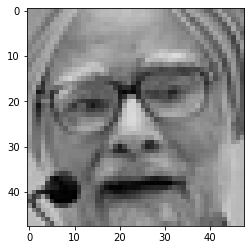

In [5]:
plt.imshow(img_array)

In [6]:
Datadirectory = "data/train/" #trainning dataset

In [7]:
classes = ["0","1","2","3","4","5","6"] #No of classes (must be exact name of the folder)

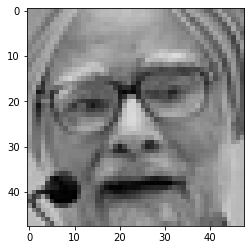

In [8]:
for category in classes:
    path = os.path.join(Datadirectory, category)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show
        break
    break

<function matplotlib.pyplot.show(close=None, block=None)>

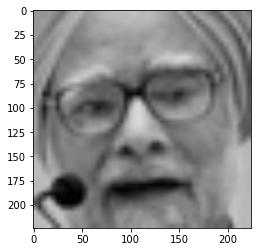

In [9]:
image_size = 224 #for image net size of the image is 224*224
new_array = cv2.resize(img_array, (image_size,image_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show

In [10]:
new_array.shape

(224, 224, 3)

In [11]:
#read all the image and convert them to array 

trainning_data = [] ## data array final

def create_trainning_data():
    for category in classes:
        path = os.path.join(Datadirectory, category)
        class_num = classes.index(category) #label
        for image in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,image))
                new_array = cv2.resize(img_array, (image_size,image_size))
                trainning_data.append([new_array,class_num])
            except Exception as e:
                pass
       

In [12]:
create_trainning_data()

In [13]:
print(len(trainning_data))

12436


In [14]:
import random

##why shuffling? Because the model should not learn the sequence, it should be robust and dynamic
random.shuffle(trainning_data)

In [15]:
##trainning_data is a list and it has image and the class name

X = [] #features/label
y = [] #labels/class name

for features,labels in trainning_data:
    X.append(features) ##array contains images
    y.append(labels)## class name

X = np.array(X).reshape(-1,image_size,image_size,3) 
##converting it to 4 dimension because transfer learning models like mobile net take has 4 dimensions image. 
##-1 means the end i.e last number

In [16]:
X.shape

(12436, 224, 224, 3)

In [17]:
X

array([[[[121, 121, 121],
         [121, 121, 121],
         [121, 121, 121],
         ...,
         [ 12,  12,  12],
         [ 11,  11,  11],
         [ 11,  11,  11]],

        [[121, 121, 121],
         [121, 121, 121],
         [121, 121, 121],
         ...,
         [ 12,  12,  12],
         [ 11,  11,  11],
         [ 11,  11,  11]],

        [[121, 121, 121],
         [121, 121, 121],
         [121, 121, 121],
         ...,
         [ 12,  12,  12],
         [ 11,  11,  11],
         [ 11,  11,  11]],

        ...,

        [[220, 220, 220],
         [220, 220, 220],
         [220, 220, 220],
         ...,
         [133, 133, 133],
         [133, 133, 133],
         [133, 133, 133]],

        [[220, 220, 220],
         [220, 220, 220],
         [220, 220, 220],
         ...,
         [134, 134, 134],
         [134, 134, 134],
         [134, 134, 134]],

        [[220, 220, 220],
         [220, 220, 220],
         [220, 220, 220],
         ...,
         [134, 134, 134],
        

In [18]:
##before using deep learning method we need to normalize the image. There are many methods available for normalizing like
## skicit learn and so on. But we simply divide. 

##Maximum level to the black is 255 and minimum level to white is 0. we are dividing by the maximum value

X = X/255.0; ##normalizing the image

#before trainning we should always normalize the data

In [19]:
X.shape

(12436, 224, 224, 3)

In [20]:
type(y)

list

In [21]:
Y = np.array(y) #converting the list to array

In [22]:
Y.shape

(12436,)

## Trainning the model

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
model = tf.keras.applications.MobileNetV2() ##Selecting the transfer learning model

In [25]:
model.summary()

##the first row in the output shape tells us that it takes the rgb image. So if the image is grey we have to convert it to RGB.
## In the end you can see it has 3.5 million parameters
##in the last row of the output shape u can see that is trained on 1000 classes

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [26]:
base_input = model.layers[0].input #first layer
base_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [27]:
base_output = model.layers[-2].output
base_output

### here we are taking the last layer because we need to change the number of classes to 7


<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [28]:
##we are adding two layers to change the classes to 7
##adding 3 fully connected layer

final_output = layers.Dense(128)(base_output) ##adding a new layer after the global average pooling layer
final_output = layers.Activation('relu')(final_output) #Activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation = 'softmax')(final_output) #converting the activation function to softmax

#since the final layer is classification layer we r using softmax layer

In [29]:
final_output ##We have created the layer but we haven't added to the model

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [30]:
##creating model

new_model = keras.Model(inputs = base_input, outputs = final_output)

In [31]:
new_model.summary() 
##if you see the summary u can see that the same model is created but after the global pooling layer we have added three layers.
## the final layer has 7 classes.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [32]:
y[0] #0000001 0000010 0000100 this is one hot encoding but this is not the case here 
##that's y for loss function we r choosing spare categorical crossentropy

5

In [33]:
new_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [33]:
Y[7000]

6

In [34]:
new_model.fit(X,Y,epochs = 25)

Epoch 1/25
389/389 [==============================] - 946s 2s/step - loss: 1.4079 - accuracy: 0.4699
Epoch 2/25
389/389 [==============================] - 844s 2s/step - loss: 1.1881 - accuracy: 0.5580
Epoch 3/25
389/389 [==============================] - 825s 2s/step - loss: 1.0816 - accuracy: 0.5941
Epoch 4/25
389/389 [==============================] - 816s 2s/step - loss: 1.0099 - accuracy: 0.6275
Epoch 5/25
389/389 [==============================] - 771s 2s/step - loss: 0.9354 - accuracy: 0.6519
Epoch 6/25
389/389 [==============================] - 775s 2s/step - loss: 0.8798 - accuracy: 0.6774
Epoch 7/25
389/389 [==============================] - 772s 2s/step - loss: 0.8220 - accuracy: 0.6972
Epoch 8/25
389/389 [==============================] - 771s 2s/step - loss: 0.7599 - accuracy: 0.7257
Epoch 9/25
389/389 [==============================] - 808s 2s/step - loss: 0.6969 - accuracy: 0.7487
Epoch 10/25
389/389 [==============================] - 906s 2s/step - loss: 0.6363 - accura

In [35]:
new_model.save('Emotion_Classification')

INFO:tensorflow:Assets written to: Emotion_Classification\assets


INFO:tensorflow:Assets written to: Emotion_Classification\assets


In [4]:
#to_load the model

new_model = tf.keras.models.load_model('Emotion_Classification')

In [5]:
new_model.evaluate##for accuracy

<bound method Model.evaluate of <keras.engine.functional.Functional object at 0x000001D9D18050D0>>

In [6]:
frame = cv2.imread('happy.jpg') 

In [7]:
frame.shape

(417, 626, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

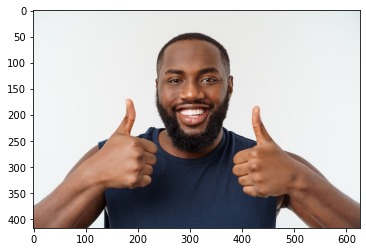

In [8]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
plt.show

In [9]:
#Face detection Algotithm

In [10]:
#using haar cascades frontal face, for grey image
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [11]:
#converting the image tp gray image
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [12]:
gray.shape

(417, 626)

In [13]:
#opencv code for detecting faces in the image, if their is no face it will throw an error.

faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0) , 2) #bgr color, soit's blue
    facess =  faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("no face")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]
            
##roi = region of interest. We have set some boundary. 

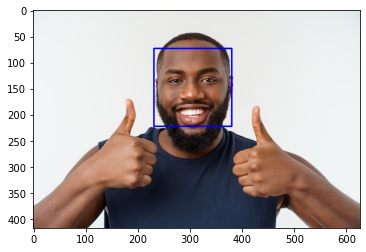

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

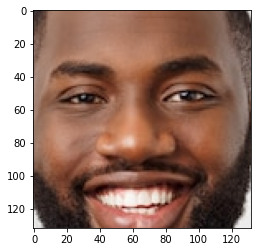

In [15]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [16]:
final_image = cv2.resize(face_roi, (224,224)) #resizing
final_image = np.expand_dims(final_image, axis=0) #making it 4 dimension
final_image = final_image/255.0 #normalizing

In [17]:
predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 878ms/step


In [18]:
predictions

array([[4.3938497e-05, 6.8378775e-08, 1.4574082e-03, 9.9738258e-01,
        2.6470721e-06, 2.8156527e-04, 8.3180267e-04]], dtype=float32)

In [19]:
np.argmax(predictions)

3

### Realtime Webcam

In [20]:
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN


##setting the rectangular background to white
rectangle_bgr = (255,255,255)


##Making a black image
img = np.zeros((500,500))

##Setting some text in the box
text = "some text in the box!"

##getting width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]

##setting the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25


##making the coords of the box with a small padding of two pixel
box_coords = ((text_offset_x,text_offset_y), (text_offset_x+ text_width +2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x,text_offset_y), font,fontScale = font_scale, color = (0,0,0), thickness = 1 )


cap = cv2.VideoCapture(1)
#checking is webcam is openedcorrectly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0) , 2) #bgr color, soit's blue
        facess =  faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("no face")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh, ex:ex+ew]
    
    
    
    final_image = cv2.resize(face_roi, (224,224)) #resizing
    final_image = np.expand_dims(final_image, axis=0) #making it 4 dimension
    final_image = final_image/255.0 #normalizing
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (np.argmax(predictions) == 0):
        status = "Angry"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        #draw black background
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.7, (0,0,255),2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    
    elif (np.argmax(predictions) == 1):
        status = "Disgust"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        #draw black background
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.7, (0,0,255),2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
       
    elif (np.argmax(predictions) == 2):
        status = "Fear"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        #draw black background
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.7, (0,0,255),2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    
    elif (np.argmax(predictions) == 3):
        status = "Happy"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        #draw black background
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.7, (0,0,255),2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    
    elif (np.argmax(predictions) == 4):
        status = "Sad"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        #draw black background
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.7, (0,0,255),2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    
    elif (np.argmax(predictions) == 5):
        status = "Surprised"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        #draw black background
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.7, (0,0,255),2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    
    else:
        status = "Neutral"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        #draw black background
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.7, (0,0,255),2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
        
    cv2.imshow('Face Emotion Recognition', frame)
     
    if cv2.waitKey(2) & 0XFF == ord('q'):
        break
    
    
cap.release()
cv2.destroyAllWindows()
    




1/1 [==============================] - 0s 50ms/step
no face
1/1 [==============================] - 0s 48ms/step
no face
no face
1/1 [==============================] - 0s 47ms/step
no face
1/1 [==============================] - 0s 47ms/step
no face
1/1 [==============================] - 0s 47ms/step
no face
1/1 [==============================] - 0s 52ms/step
no face
1/1 [==============================] - 0s 38ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 35ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 35ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 38ms/step
no face
1/1 [==============================] - 0s 35ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 35ms/step
no face
1/1 [==============================] - 0s 35ms/step
no face
1/1 [==============================] - 0s 35ms/step
no face
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 35ms/step
no face
1/1 [==============================] - 0s 35ms/step
no face
1/1 [==============================] - 0s 38ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [===================

1/1 [==============================] - 0s 38ms/step
no face
1/1 [==============================] - 0s 40ms/step
no face
1/1 [==============================] - 0s 35ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face


1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 35ms/step
no face
1/1 [==============================] - 0s 38ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 38ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0s 41ms/step
no face
1/1 [==============================] - 0s 39ms/step
no face
1/1 [==============================] - 0s 35ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 39ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0

1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0s 39ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0s 41ms/step
no face
1/1 [==============================] - 0s 35ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0

1/1 [==============================] - 0s 44ms/step
no face
1/1 [==============================] - 0s 38ms/step
no face
1/1 [==============================] - 0s 39ms/step
no face
1/1 [==============================] - 0s 49ms/step
no face
1/1 [==============================] - 0s 38ms/step
no face
1/1 [==============================] - 0s 39ms/step
no face
1/1 [==============================] - 0s 41ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0s 35ms/step
no face
1/1 [==============================] - 0s 39ms/step
no face
1/1 [==============================] - 0s 39ms/step
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
no face
1/1 [==============================] - 0s 36ms/step
no face
1/1 [==============================] - 0s 37ms/step
no face
1/1 [===========================

1/1 [==============================] - 0s 55ms/step
no face
1/1 [==============================] - 0s 60ms/step
no face
1/1 [==============================] - 0s 43ms/step
no face
1/1 [==============================] - 0s 42ms/step
no face
1/1 [==============================] - 0s 56ms/step
no face
1/1 [==============================] - 0s 57ms/step
no face
1/1 [==============================] - 0s 54ms/step
no face
1/1 [==============================] - 0s 54ms/step
no face
1/1 [==============================] - 0s 54ms/step
no face
1/1 [==============================] - 0s 56ms/step
no face
1/1 [==============================] - 0s 53ms/step
no face
1/1 [==============================] - 0s 42ms/step
no face
1/1 [==============================] - 0s 56ms/step
no face
1/1 [==============================] - 0s 56ms/step
no face
1/1 [==============================] - 0s 55ms/step
no face
1/1 [==============================] - 0s 54ms/step
no face
1/1 [==============================] - 0

1/1 [==============================] - 0s 53ms/step
no face
1/1 [==============================] - 0s 55ms/step
no face
1/1 [==============================] - 0s 57ms/step
no face
1/1 [==============================] - 0s 54ms/step
no face
1/1 [==============================] - 0s 58ms/step
no face
1/1 [==============================] - 0s 62ms/step
no face
1/1 [==============================] - 0s 58ms/step
no face
1/1 [==============================] - 0s 59ms/step
no face
1/1 [==============================] - 0s 42ms/step
no face
1/1 [==============================] - 0s 42ms/step
no face
1/1 [==============================] - 0s 46ms/step
no face
1/1 [==============================] - 0s 46ms/step
no face
no face
1/1 [==============================] - 0s 60ms/step
no face
1/1 [==============================] - 0s 53ms/step
no face
1/1 [==============================] - 0s 45ms/step
no face
no face
1/1 [==============================] - 0s 45ms/step
no face
1/1 [===================

KeyboardInterrupt: 